<a href="https://github.com/SquireUA">Секретарюк Валерій</a>, 2024

<h1 align="center">Лабораторна робота 2. Побудова лінійного бінарного класифікатора на основі оптимізації функціонала якості</h1>
<p><b>Метa:</b> реалізузвати бінарний класифікатор на основі оптимізації функціонала якості засобами мови Python</p>

<h2> Завдання для самостійної роботи </h2>

[ 0.00092111 -0.02368048  0.81022199]


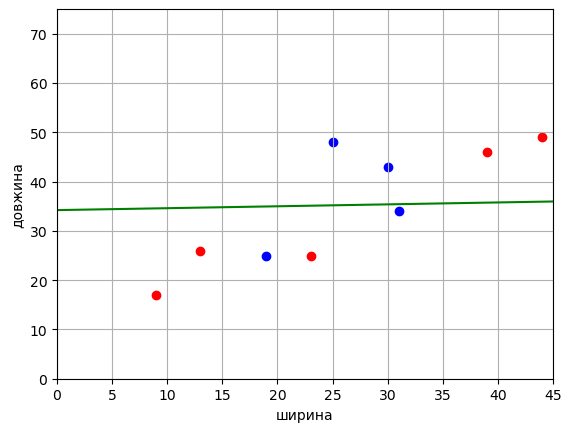

Порівняно з простим лінійним бінарним класифікатором МНК-класифікатор розрізняє образи краще, якщо образи не чітко розрізнені


In [3]:
import numpy as np
import matplotlib.pyplot as plt

array_x = []
array_y = []
filename = 'data.txt'  # Назва вашого файлу
    # Відкриваємо файл для читання
with open(filename, 'r') as file:
    for line in file:
        values = line.strip().split()
        row = [int(value) for value in values]
        if len(row) == 2:
            array_x.append(row)
        else:
            array_y = row
            
array_x = [x + [1] for x in array_x]  # Додаємо зміщення для кожного прикладу            
x_train = np.array(array_x)
y_train = np.array(array_y)

pt = np.sum([x * y for x, y in zip(x_train, y_train)], axis=0)  # Обчислення підсумку
xxt = np.sum([np.outer(x, x) for x in x_train], axis=0)  # Обчислення підсумку зовнішнього добутку
w = np.dot(pt, np.linalg.inv(xxt))  # Обчислення вагових коефіцієнтів
print(w)

line_x = list(range(max(x_train[:, 0])))    # формування координат для лінії розділення
line_y = [-x*w[0]/w[1] - w[2]/w[1] for x in line_x]

x_0 = x_train[y_train == 1]                 # формування точок для класу 1
x_1 = x_train[y_train == -1]                # і класу -1

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')  # відображення точок класу 1 червоним кольором
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')  # відображення точок класу -1 синім кольором
plt.plot(line_x, line_y, color='green')  # відображення лінії розділення зеленим кольором

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("довжина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

print("Порівняно з простим лінійним бінарним класифікатором МНК-класифікатор розрізняє образи краще, якщо образи не чітко розрізнені")

<h1 align="center">Контрольні запитання</h1>


1.Відступ (margin) визначає відстань від розділяючої поверхні до найближчого прикладу навчання. У багатьох алгоритмах машинного навчання відступ використовується для визначення якості моделі. 
Роль відступу в побудові моделі класифікації полягає в тому, що він дозволяє оцінити стійкість та загальний рівень упевненості моделі в класифікації прикладів. Чим більший відступ, тим більше простір для помилок може бути забезпечений, що вказує на більшу стійкість моделі до шуму чи варіації в дани1. Функція втрат визначає, наскільки добре модель класифікації працює на навчальних даних, порівнюючи прогнозовані значення зі справжніми мітками класів. Її роль полягає в тому, щоб задати цільову мету для оптимізації: ми хочемо, щоб модель мінімізувала цю функцію втрат, щоб прогнози були якомога ближчими до правильних міток. Знайти коефіцієнти лінійного класифікатора шляхом безпосереднього розв'язаня задачі оптимізації через знаходження похідної не можна, через те що вона представляє собою кусочно-неперервну не диференційовану 
функці), тому застосувати градієнтний метод для його мінімізації не  
можливи
1. В простиму лінійному бінарнимому класифікатору ми задавали початкове значення вектора і покроково корезували його напрямок. В МНК-класифікаторі ми будуємо вектор з нуля за допомогою функції вт
1. $y_i(w^Tx_i+≥1$l>